# Default On Credit Cards Data - Machine Learning

The dataset being used for this analysis is the [Default on Credit Cards Client Data Set](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#). This the data is comprised of 30000 customers from a major Taiwanese bank, in which 22% have defaulted on a credit card payment. The goal is to train a machine learning model to predict if a customer will default on payement. 

### Features of the Dataset

**Note** all variables in dataset of of type integer
- **ID**: identifier for each client in the dataset 
- **LIMIT_BAL**: amount of credit given in NTD 
- **SEX**: gender (1 = male; 2 = female)
- **EDUCATION**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- **MARRIAGE**: Marital status (1 = married; 2 = single; 3 = others)
- **AGE**: age in years
- **PAY_0 to PAY_6**: history of past payements made on credit card in NTD from April to September, 2005 (each pay period represents a month). -1 = pay duly, 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- **BILL_AMT1 to BILL_AMT6**: Amount of the bill payment due for each month from April to September, 2005 in NTD
- **PAY_AMT1 to PAY_AMT1**: amount of the previous payment fro the month from April to September, 2005 in NTD

Target variable: default payment next month (Yes = 1, No = 0) 

## Exploring the dataset and Data Cleaning

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading In Data

In [2]:
credit = pd.read_excel("C:/Users/Thomshu/Dropbox/COMP-3710 AI Concepts/Final Proj/Default-Credit-Card-Prediction-master/default of credit card clients.xls", header=1)
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# basic cleaning 
# drop ID column as it provides no useful information
credit.drop(['ID'], axis= 1, inplace=True)
# shorten name of target variable to something easier to remember
credit.rename(columns={"PAY_0": "PAY_1", "default payment next month": "DEFAULT"}, inplace=True)
#  Because PAY_1 doesn't exist and it goes from PAY 0, PAY_2 to PAY_6, so we rename PAY_0 to PAY_1
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Exploring data

In [5]:
credit.isnull().sum() #Checking for null values based on outputted table, no null values

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

### Exploring categorical data

In [6]:
categories = ["MARRIAGE", "EDUCATION", "SEX"]
for col in categories:
    print(col)
    print(credit[col].value_counts())

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
SEX
2    18112
1    11888
Name: SEX, dtype: int64


When observing the values present for Marriage, Education and Sex, we notice that there are values not documented to a described category, e.g. Marriage (Marital Status) describes 1, 2, 3 as married, single or other respectively, but there is an additional 0 category with 54 values. 
Similarly, for Education 1-4 is documented as graduate, university, high school or others but we see additional values for the undocumented categories of 0, 5, 6. 

For these undocumented categories, there are two ways to correct for them, either delete the rows associated with them or assign those rows with the mode for that feature (e.g. for marriage it would be 2).

Based on the low number of values in respect to the total number of values for these undocumented categories, we decided to just simply remove those rows of values as done in the next cell below.
As a result only 399 values were removed of the total 30000 values, which is minimal.

In [7]:
credit.shape
credit = credit.loc[credit["MARRIAGE"] != 0]
credit = credit.loc[credit["EDUCATION"] != 0]
credit = credit.loc[credit["EDUCATION"] != 5]
credit = credit.loc[credit["EDUCATION"] != 6]

credit.shape

(29601, 24)

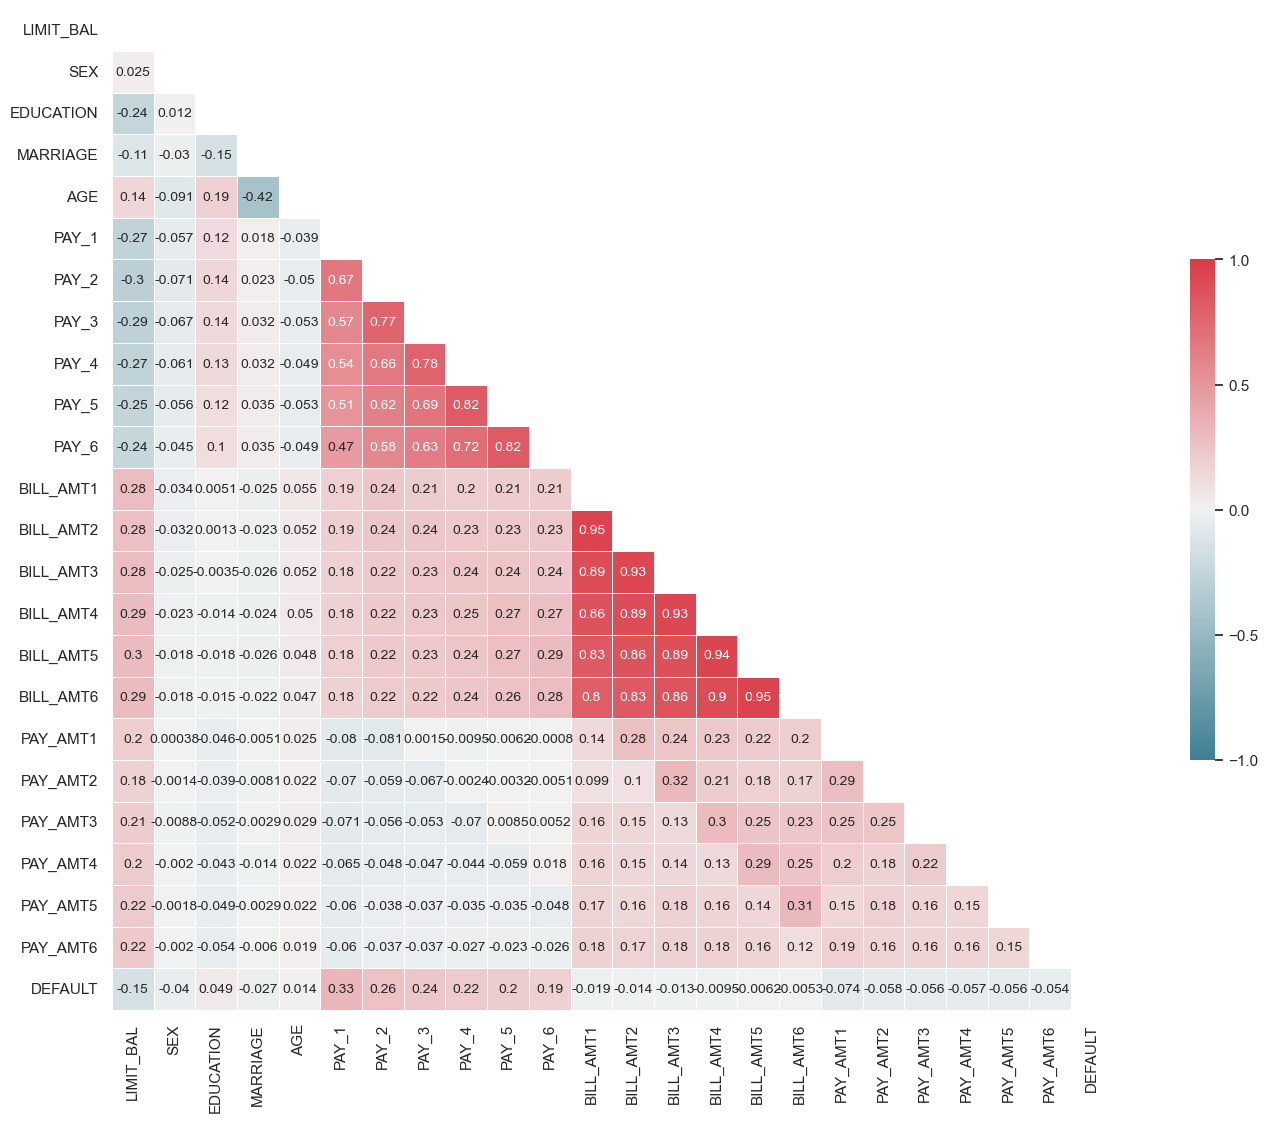

In [8]:
# Correlation matrix
sns.set(style = "white", font_scale = 1)
corr = credit.corr() # .corr is used to find corelation

mask = np.triu(np.ones_like(corr, dtype = bool))
fig, ax = plt.subplots(figsize = (20, 13))
cmap = sns.diverging_palette(220, 10, as_cmap = True)
ax=sns.heatmap(corr, mask = mask, vmax = 1, vmin = -1, center = 0, square = True, linewidths = .5, cmap = cmap, cbar_kws = {"shrink": .5}, annot=True, annot_kws={"size": 10})
cbar=ax.collections[0].colorbar
cbar.set_ticks([-1, -0.50, 0, 0.50, 1])
plt.savefig('Figure - Correlation matrix by means of the Pearson’s coefficient for all feature pairs.png')

This program takes the listed num values and produced a correlation maxtrix using the pearson's coefficient. 

## Data Preprocessing 

### Train, Validation, test Datasets


In [9]:
from sklearn.model_selection import train_test_split 

features = credit.drop('DEFAULT', axis=1)
labels = credit['DEFAULT']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42) #random_state is the initializer seed for the randomizer

#We split the data into 80/20 percentage split, so we have 80% of the data in the training set and 20% of the data in the test set

In [10]:
y_train.value_counts() #Confirming the training set contains 80% of the data (29601 * 0.8) <- recall we removed 399 values out of our 30000 dataset

0    18405
1     5275
Name: DEFAULT, dtype: int64

#### Feature Scaling

In [11]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
df = pd.DataFrame(X_train, columns = credit.columns[:-1])
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.481095,0.809332,0.254274,-1.074526,-0.051489,0.009536,0.106744,0.132057,0.186462,0.228234,...,1.501486,1.686391,1.772691,1.918806,0.255960,0.163816,0.264113,0.134481,0.337266,0.264700
1,-0.827493,0.809332,0.254274,-1.074526,0.057364,0.009536,0.106744,0.132057,0.186462,0.228234,...,-0.015526,-0.104602,-0.049441,-0.012449,-0.209107,-0.161962,-0.197435,-0.214656,-0.221946,-0.207390
2,0.173192,-1.235587,0.254274,0.858673,-0.813461,-1.768501,-1.561150,-1.533071,-1.521962,-1.532789,...,-0.675463,-0.671231,-0.662749,-0.652792,-0.332545,-0.243305,-0.291969,-0.309875,-0.312981,-0.290700
3,-0.519590,-1.235587,-1.150582,0.858673,-0.922314,0.009536,0.106744,0.132057,0.186462,0.228234,...,0.264321,0.279651,0.404593,0.460547,-0.097425,-0.150737,-0.159788,0.007522,-0.156206,-0.158293
4,-1.058420,0.809332,0.254274,-1.074526,-0.160342,0.009536,-0.727203,-0.700507,0.186462,0.228234,...,-0.327152,-0.286466,-0.288138,-0.472382,-0.258482,0.738301,-0.236360,-0.182916,0.385710,0.740788


#### Oversampling

In [13]:
#Checking for the Binary Defaults, then determining if we need to Oversample
y_train.value_counts()

0    18405
1     5275
Name: DEFAULT, dtype: int64

In [14]:
#Oversampling
# Two choices for Oversampling, either use SMOTE (Synthetic Minority Over-sampling Technique) or ROS (Random Over Sampling), we chose ROS in this case
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

y_train.value_counts()

# DELETE COMMENT FOR OUR OWN INFORMATION
# In general, oversampling is useful when the minority class is severely underrepresented, and the dataset has a large number of features. 
# By increasing the number of instances in the minority class, oversampling can help the model learn more about the patterns of the minority class and 
# improve the model's ability to make accurate predictions. 

0    18405
1    18405
Name: DEFAULT, dtype: int64

## Hyperparameter tuning using GridSearchCV

In [15]:
# import libraries for SVC and hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [16]:
# function for printing out results from GridSearchCV

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

### Decision Tree Training and Testing

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'], #Gini impurity
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(range(1, 21)),
    'max_features': [None] + list(range(1,23))
}

dtcv = GridSearchCV(estimator=dt, param_grid = param_grid, cv=3, n_jobs=6, verbose=1)

dtcv.fit(X_train, y_train)

print_results(dtcv)


Fitting 3 folds for each of 1932 candidates, totalling 5796 fits
BEST PARAMS: {'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'splitter': 'best'}

0.877 (+/-0.023) for {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'splitter': 'best'}
0.878 (+/-0.023) for {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'splitter': 'random'}
0.876 (+/-0.02) for {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'splitter': 'best'}
0.875 (+/-0.027) for {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'splitter': 'random'}
0.875 (+/-0.015) for {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'splitter': 'best'}
0.877 (+/-0.019) for {'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'splitter': 'random'}
0.876 (+/-0.022) for {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'splitter': 'best'}
0.878 (+/-0.025) for {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'splitter': 'random'}
0.879 (+/-0.017) 

Gini Impurity measures the impurity of the data set. 
entropy maximizes the info gain at each node split

max_features looks for best split possible (none considers all features (sqrt & log2)

In [20]:
print(dtcv.best_score_)
print(dtcv.best_estimator_)
print(dtcv.best_params_)

0.8801412659603368
DecisionTreeClassifier(criterion='entropy', max_features=9)
{'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'splitter': 'best'}


In [21]:
#Training model using best hyperparameters
dtcv_trainer = DecisionTreeClassifier(criterion= 'entropy', max_depth= None, max_features= 9, splitter = 'best', random_state=42)
dtcv_trainer.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_features=9, random_state=42)

In [22]:
dtcv_pred = dtcv_trainer.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

# this prints the graph that tells you how well prediction went
print(classification_report(y_test, dtcv_pred))
# prints confusion matrix
print(confusion_matrix(y_test, dtcv_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      4591
           1       0.42      0.41      0.41      1330

    accuracy                           0.74      5921
   macro avg       0.62      0.62      0.62      5921
weighted avg       0.74      0.74      0.74      5921

[[3835  756]
 [ 785  545]]


### K-Nearest Neighbours Training and Testing

In [21]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Define the parameter grid
knnparameters = {
    'n_neighbors': list(range(1, 20)), # Arbirtrarily chose to explore ranges of 1 to 20 for how many neighbors, when using GridSearchCV hyperparameter tuning
    'weights': ['uniform', 'distance'], #only two available pre-defined weights in sklearn
    'metric': ['euclidean', 'manhattan', 'minkowski'] #Commonly used distance metrics
}

# Create an instance of GridSearchCV
knncv = GridSearchCV(estimator = knn, param_grid = knnparameters, cv=3, n_jobs=6, verbose=1)

# Fit the grid search on the training data
knncv.fit(X_train, y_train)

print_results(knncv)


Fitting 3 folds for each of 114 candidates, totalling 342 fits
BEST PARAMS: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}

0.877 (+/-0.019) for {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.877 (+/-0.019) for {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.822 (+/-0.012) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.877 (+/-0.019) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.783 (+/-0.012) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.835 (+/-0.02) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.758 (+/-0.008) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.843 (+/-0.02) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.742 (+/-0.011) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.829 (+/-0.027) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.735 

In [22]:
print(knncv.best_score_)
print(knncv.best_estimator_)
print(knncv.best_params_)

0.8770714479760935
KNeighborsClassifier(metric='euclidean', n_neighbors=1)
{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


In [23]:
#Training model using best hyperparameters
knncv_trainer = KNeighborsClassifier(metric='euclidean', n_neighbors=1, weights='uniform')
knncv_trainer.fit(X_train, y_train) 

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [24]:
knncv_pred = knncv_trainer.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

# this prints the graph that tells you how well prediction went
print(classification_report(y_test, knncv_pred))
# prints confusion matrix
print(confusion_matrix(y_test, knncv_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      4591
           1       0.40      0.38      0.39      1330

    accuracy                           0.73      5921
   macro avg       0.61      0.61      0.61      5921
weighted avg       0.73      0.73      0.73      5921

[[3827  764]
 [ 827  503]]


### Support Vector Machine Training and Testing (using C-Support Vector Classification: SVC)

In [25]:
from sklearn.svm import SVC

svc = SVC()
svcparameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10] 
}

svccv = GridSearchCV(estimator=svc, param_grid= svcparameters, cv=3, n_jobs=6, verbose=1)
svccv.fit(X_train, y_train)

print_results(svccv)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
BEST PARAMS: {'C': 10, 'kernel': 'rbf'}

0.683 (+/-0.004) for {'C': 0.1, 'kernel': 'linear'}
0.704 (+/-0.007) for {'C': 0.1, 'kernel': 'rbf'}
0.682 (+/-0.003) for {'C': 1, 'kernel': 'linear'}
0.717 (+/-0.005) for {'C': 1, 'kernel': 'rbf'}
0.682 (+/-0.003) for {'C': 10, 'kernel': 'linear'}
0.737 (+/-0.007) for {'C': 10, 'kernel': 'rbf'}


In [26]:
print(svccv.best_score_)
print(svccv.best_estimator_)
print(svccv.best_params_)

0.7373811464276012
SVC(C=10)
{'C': 10, 'kernel': 'rbf'}


In [27]:
#Training model using best hyperparameters
svc_trainer = SVC(kernel='rbf', C=10, random_state=42)
svc_trainer.fit(X_train, y_train)

SVC(C=10, random_state=42)

In [28]:
svc_pred = svc_trainer.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

# this prints the graph that tells you how well prediction went
print(classification_report(y_test, svc_pred))
# prints confusion matrix
print(confusion_matrix(y_test, svc_pred))


              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4591
           1       0.48      0.58      0.52      1330

    accuracy                           0.76      5921
   macro avg       0.67      0.70      0.68      5921
weighted avg       0.78      0.76      0.77      5921

[[3739  852]
 [ 555  775]]
